# BUS 32100 

## Final Exam, Autum 2021

Please choose one of the three datasets below, or any data set you did not use from the midterm, or any dataset that you have available to you (either that you find online or from any other work that you do) and run a full set of data analytics. This includes cleaning the data, EDA, engineering at least one feature, and running at least one model. 

**Grading rubric:**

You will be graded out of 100. We will assign points in this way: 

> Comments and explanation: 10 points
>> * Does your code have sufficient comments? No particular style is required, we're just looking for some helpful explanation of what you're doing
>> * Have you included text explanations of what you're doing at each step, and what you've learned from specific analyses? Include sufficient exposition about what you did and what you learned from it. More points will be given for weaving this throughout the whole analysis instead of a single summary at the end/beginning 

> Problem question and conclusion: 10 points
>> * Write out in words what your problem statement is, aka why should we care? Who's your audience? 
>> * Write out your conclusion in words
>> * These points are separate from above, where we're looking for exposition throughout 

> Data cleaning: 10 points
>> * Have you checked whether the data has errors? E.g. missing values that can be filled in, incorrect headers, outliers, etc. If the dataset you chose does not require cleaning, we'll be looking for evidence that you did quality checks (e.g. what's the range of each feature, do the max/min values make sense)

> EDA: 25 points
>> * After you've cleaned the data, have you created plots or tables to understand the data
>> * Go back to the diamonds example in R for some inspiration of useful EDA
>> * We'll be looking for high-quality plots/tables here: this means you don't have to create a large number of plots, but make sure the ones you do make are reasonable for the problem you're trying to solve 

> Feature engineering: 15 points
>> * Did you create at least one new column for your data
>> * To get full credit, use your new feature in your model
>> * Be careful to avoid data leakage! That is, don't use your output variable (y) in your new column! 

> Model: 25 points
>> * Did you create at least one model (linear regression or logistic regression) 
>> * Did you use the appropriate metrics to judge your model? E.g. RMSE, R^2, accuracy, precision, recall 
>> * For full credit, you'll probably have to create more than one model: change your inputs and see if it improves your model
>> * If it makes sense, add a chart to explain if your model is working well (e.g. residual plot, confusion matrix) 

> Style: 5 points
>> * A spillover category to capture anything else you add to your analysis 
>> * We'll be looking at your project holistically here: does it flow, does it read easily, is it polished and can it be presented as a work product 

Minimally sufficient outputs (remember, if you just check all the boxes in a minimal way, the max grade for that will be a B or B+ at most): 
* Data quality check (for example, are there nulls)
* One EDA chart or table
* One instance of feature engineering 
* One model (linear regression or logistic regression)
* One metric for the above model (e.g. R^2, or confusion matrix) 

-----------------------------------------------

## Problem Question

This data can help current wine manufacturers as well as future producers who would like to enter the market and want to know about the current market standards that other competitors abide by. It can serve as a base for a market research of white wine. This data should help—current and future producers—to know exactly what are the significant inputs that would affect the quality of their wine. Therefore, the problem question would be: 

- What are the factors that affect the quality of white wine and to what degree? 


### 1. Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
wine = pd.read_csv('folder0-data/folder1-data/winequality-white.csv', sep=";")

In [3]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## 2. Cleaning

- After importig the data, we need to clean it. First I will look for missing values useing info()

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- It seems that that there are no missing (null) values but to be more sure, I used isnull() 

In [6]:
wine.isnull().values.any()

False

- Since It turned out to be false, I will continue to clean the data by looking for outliers by using describe()

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- There are several outliers in residual sugar, free sulfur dioxide and total sulfur dioxide as the range between the numbers that represent the minimum and maximum values and the 25% - 75% is huge. 

- First I used shape to be able to test later if the outliers have been removed or not 

In [8]:
wine.shape

(4898, 12)

- Then I used mask to remove these outliers

In [9]:
mask =  (wine['free sulfur dioxide'] >= 23) & (wine['free sulfur dioxide'] <= 289) &(wine['total sulfur dioxide'] >= 9) & (wine['total sulfur dioxide']<= 167) &(wine['residual sugar'] >= 1) & (wine['residual sugar']<= 66)

In [10]:
mask

0       False
1       False
2        True
3       False
4       False
        ...  
4893     True
4894    False
4895     True
4896    False
4897    False
Length: 4898, dtype: bool

In [11]:
wine = wine[mask]

In [12]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7
16,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8


In [13]:
wine.shape

(2572, 12)

- I used shape again, I can now notice that the outliers have been removed since the number of rows had decreased 

In [14]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7
16,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8


- Some of the columns as quality can be turned into categorical data which might be helpful for companies. For example: if a company would like to check the quality level of its white wine, it can type the number in the function, which will return whether its wine is of high, medium or low quality. This feature will enable companies to go back and make changes in its inputs if the quality turned out to be medium or low. 


- First, I used value_counts() to be able to organize the categorical data accordingly into the numbers 

In [15]:
wine.quality.value_counts()

6    1234
7     623
5     554
8     123
4      31
9       5
3       2
Name: quality, dtype: int64

In [16]:
def what_is_the_quality_level(quality):
    if quality > 6:
        return 'high'
    elif quality < 5:
        return 'low'
    else:
        return 'medium'

In [17]:
what_is_the_quality_level(9)

'high'

In [18]:
wine['quality_level'] = wine.quality.apply(what_is_the_quality_level)

In [19]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,high
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,high
16,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6,medium
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,medium
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high


- After adding the new column of quality level, I noticed that there is another column that could be turned into categorical data which is alcohol. This time this feature will be helpful, if manufacturers would like to stick to a certain percentage of alcohol. 



- I followed the same steps that I used in applying the quality level function, starting be using value_counts to determine how the categorical data will look like 


In [20]:
wine.alcohol.value_counts()

10.500000    105
11.000000    104
9.400000      92
10.800000     87
11.300000     81
            ... 
11.366667      1
13.550000      1
11.066667      1
11.433333      1
12.150000      1
Name: alcohol, Length: 88, dtype: int64

In [21]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,high
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,high
16,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6,medium
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,medium
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high


In [22]:
def what_is_the_alcohol_level(alcohol):
    if alcohol >= 10:
        return 'high'
    elif alcohol <= 10:
        return 'low'
    else:
        return 'medium'

In [23]:
wine['alcohol_level'] = wine.alcohol.apply(what_is_the_alcohol_level)

In [24]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level,alcohol_level
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,high
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,high
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium,low
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium,high
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,high,high
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,high,high
16,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6,medium,low
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high,high
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,medium,low
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high,high


- I added a column that turns the numbers of alcohol into percentages because it adds more accuracy since they are not merely numbers but percentages 



In [25]:
wine['alcohol_perc'] = wine.alcohol.apply(lambda x: str(x)+'%')

In [26]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level,alcohol_level,alcohol_perc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,high,10.1%
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,high,10.1%
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium,low,9.6%
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium,high,11.0%
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,high,high,12.4%
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,high,high,11.4%
16,6.3,0.48,0.04,1.1,0.046,30.0,99.0,0.9928,3.24,0.36,9.6,6,medium,low,9.6%
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high,high,12.8%
19,6.5,0.31,0.14,7.5,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,medium,low,9.5%
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,high,high,12.8%


## 3. EDA

- After cleaning the data and applying some functions, I proceeded with doing some EDA 

- I decided to test the relationship between one of the inputs and quality as the output. For that matter, I decided to use residual sugar as my input



In [27]:
first_plot_wine = wine.groupby('residual sugar')['quality_level'].count()

In [28]:
first_plot_wine.shape

(249,)

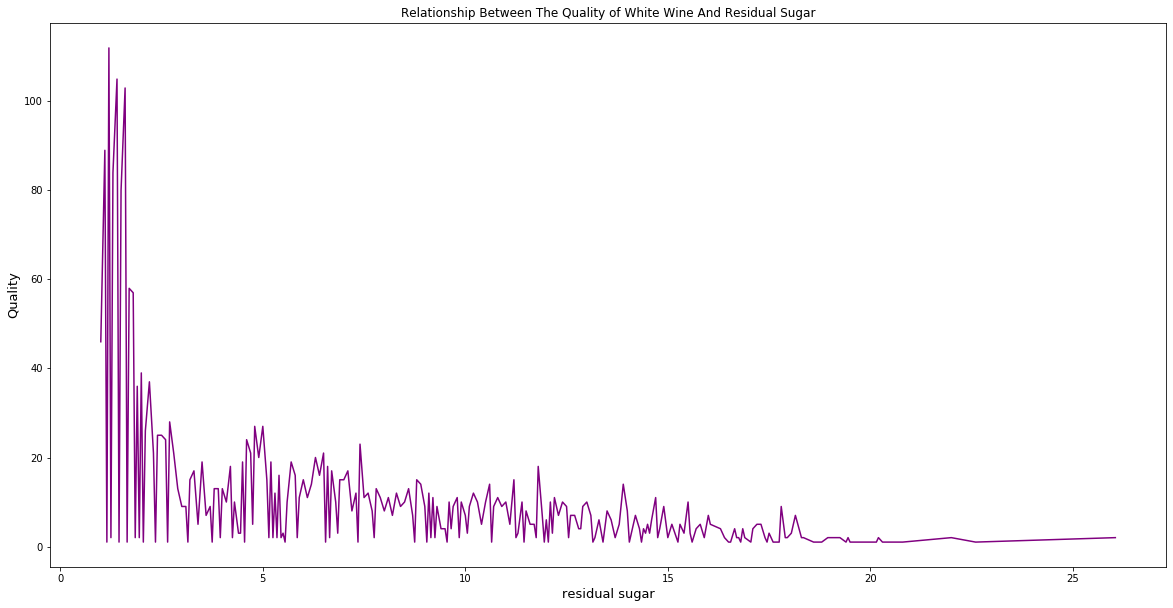

In [29]:
plt.figure(figsize = [20,10])
plt.xlabel('Residual Sugar', fontsize = 13,color='black');
plt.ylabel('Quality',fontsize = 13 ,color='black');
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
first_plot_wine.plot.line( x = 'quality' , y= 'residual sugar' , title = 'Relationship Between The Quality of White Wine And Residual Sugar',color='purple');

- Looking at the line chart, it is apparent that the higher the residual sugar added in white wine, the lower the quality. Therefore, there is a negative relationship between both


- Then I decided to test the relationship between another input and quality as an output. This time I used free sulfur dioxide

In [30]:
second_plot_wine = wine.groupby('free sulfur dioxide')['quality_level'].count()

In [31]:
second_plot_wine.shape

(68,)

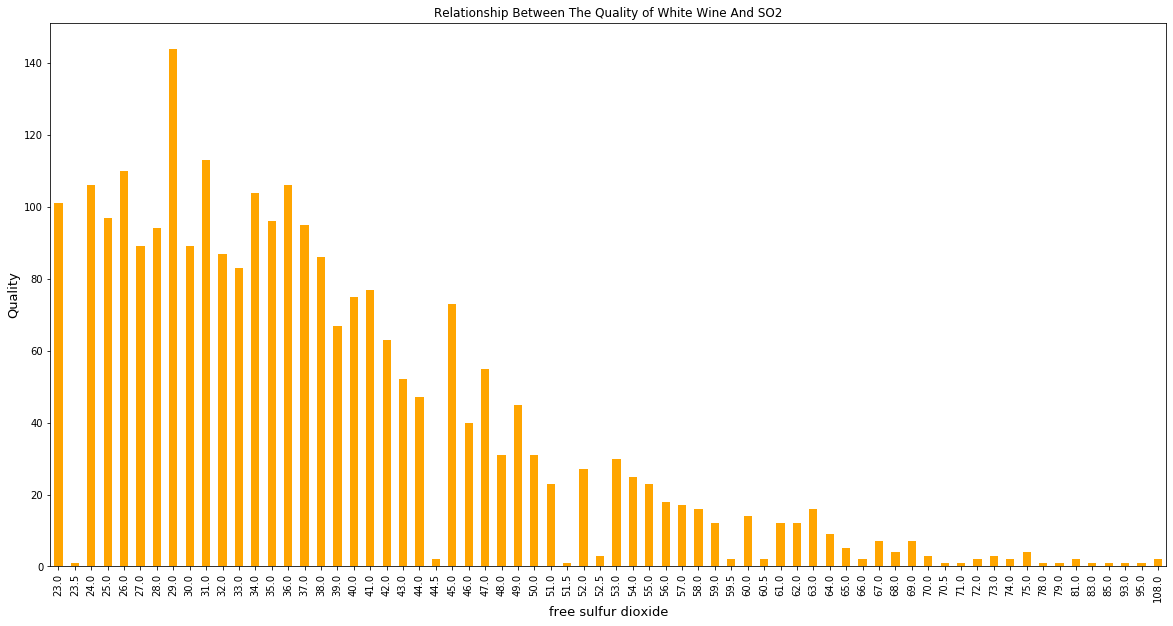

In [32]:
plt.figure(figsize = [20,10])
plt.xlabel('SO2', fontsize = 13,color='black');
plt.ylabel('Quality',fontsize = 13 ,color='black');
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
second_plot_wine.plot.bar( x = 'SO2' , y= 'Quality' , title = 'Relationship Between The Quality of White Wine And SO2',color='orange');

- There might be a negative relationship between both but there are some exceptions. For example: when SO2 is at 29, the quality is the highest, also when SO2 is 44.5 or 51.2 the quality is the lowest even though when SO2 is 45 or 52 it is higher. We might deduce that there are other inputs that affect the relationship between SO2 and quality, and hence it can't be tested on its own. Therefore, we can't say for sure that there is a negative relationship between the two factors 


- We can do a full EDA using pairplot on the whole data set, this will also help us in doing some regression analysis as we can take a glimpse on the the overall relationship between factors



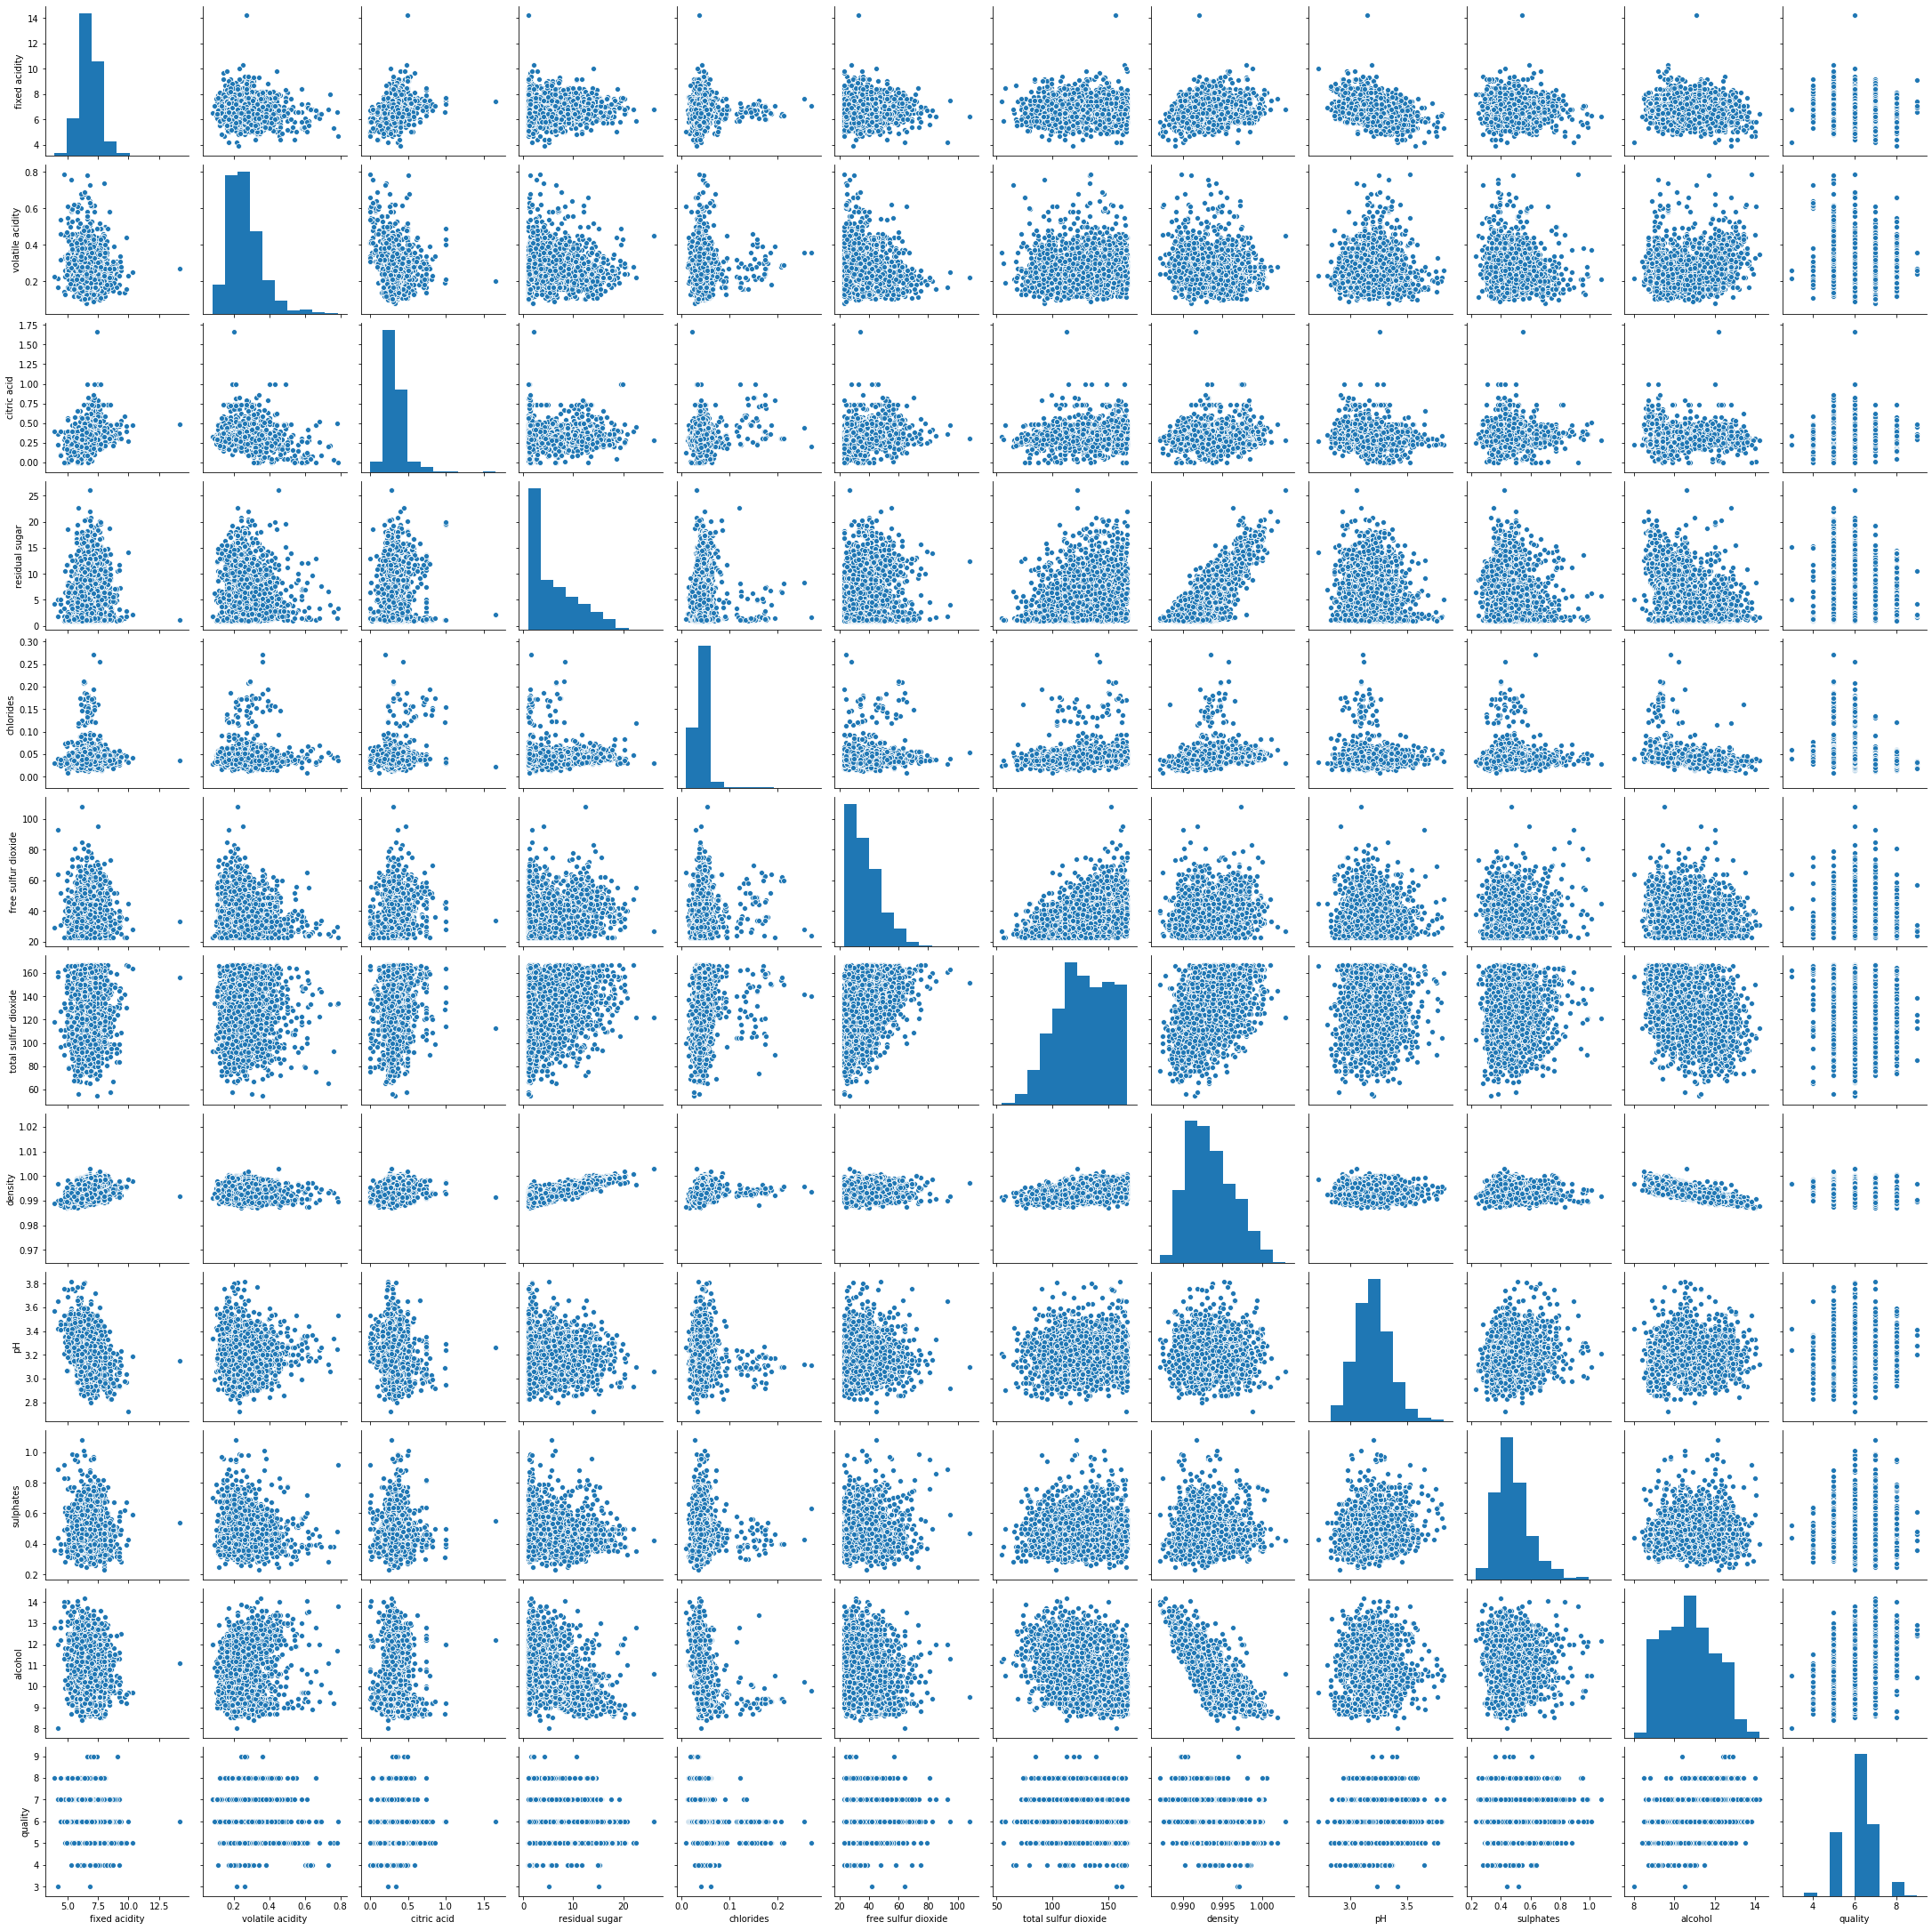

In [33]:
sns.pairplot(wine)

## Feature Engineering and Model Building

- I will create a function that will include all the regression analysis that I will use in model building and feature engineering so I wouldn't have to copy paste every time I run a linear regression


In [34]:
def run_linear_regression(X, y):
   
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    
    score = lr_model.score(X, y)
    
    print(lr_model.coef_)
    
    print('\nR-square = ', score)
    print('Feature coefficients: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [35]:
X = wine.drop(columns=["quality", "quality_level","alcohol_level","alcohol_perc"])
y = wine.loc[:,"quality"]

In [36]:
run_linear_regression(X, y)

[ 1.60336401e-01 -1.11463513e+00  8.58074126e-02  9.08931949e-02
 -7.51584493e-01  3.47380393e-03 -1.14074270e-03 -2.04774208e+02
  9.69502041e-01  9.56487422e-01  1.05715235e-01]

R-square =  0.27616390127099966
Feature coefficients: 

fixed acidity : 0.16
volatile acidity : -1.11
citric acid : 0.09
residual sugar : 0.09
chlorides : -0.75
free sulfur dioxide : 0.00
total sulfur dioxide : -0.00
density : -204.77
pH : 0.97
sulphates : 0.96
alcohol : 0.11


- It seems that there is no to little correlation between x and y in this model, maybe doing some feature engineering will improve the correlation 


- In the above pairplot, it seems that pH and free sulfur dioxide(SO2) have a parabolic relationship which I tried to turn into a linear one using polynomial terms

In [37]:
X2 = X.copy()

X2['pH_squared'] = X2['pH'] ** 2
X2['free_sulfur_dioxide_squared'] = X2['free sulfur dioxide'] ** 2

In [38]:
run_linear_regression(X2,y)

[ 1.57403355e-01 -1.08541124e+00  8.05830955e-02  8.98473341e-02
 -7.27391378e-01  1.53763790e-02 -1.28178739e-03 -2.02443933e+02
 -1.96493579e+00  9.61394007e-01  1.08191727e-01  4.52220810e-01
 -1.33872898e-04]

R-square =  0.2774967026854711
Feature coefficients: 

fixed acidity : 0.16
volatile acidity : -1.09
citric acid : 0.08
residual sugar : 0.09
chlorides : -0.73
free sulfur dioxide : 0.02
total sulfur dioxide : -0.00
density : -202.44
pH : -1.96
sulphates : 0.96
alcohol : 0.11
pH_squared : 0.45
free_sulfur_dioxide_squared : -0.00


- The relationship improved but by a very minimal amount

- I tried to further improve the correlation so I multiplied free sulfur dioxide(SO2) by pH: interaction terms, for two reasons: the two factors are dependent on each other in the sense the that a certain amount of pH requires a certain amount of SO2 to provide "bacterial stability" (source:https://www.thebeveragepeople.com/how-to/wine/free-so2-in-wine.html)
- The second reason is that as mentioned above they had a parabolic relationship which I tried to turn into a linear one using polynomial terms

In [39]:
X3 = X2.copy()

X3['the_amount_needed'] = X3['free sulfur dioxide'] * X3['pH']

In [40]:
run_linear_regression(X3,y)

[ 1.58672939e-01 -1.09310977e+00  6.87158208e-02  9.02051400e-02
 -7.30963901e-01  3.88703980e-02 -1.25897362e-03 -2.03511950e+02
 -1.80729470e+00  9.64930558e-01  1.07477130e-01  4.69741689e-01
 -1.38790934e-04 -7.24932486e-03]

R-square =  0.2777170399826153
Feature coefficients: 

fixed acidity : 0.16
volatile acidity : -1.09
citric acid : 0.07
residual sugar : 0.09
chlorides : -0.73
free sulfur dioxide : 0.04
total sulfur dioxide : -0.00
density : -203.51
pH : -1.81
sulphates : 0.96
alcohol : 0.11
pH_squared : 0.47
free_sulfur_dioxide_squared : -0.00
the_amount_needed : -0.01


- Also an improvement with a very minimal amount

- Looking back at the above pairplot, it seems that residual sugar and citric acid have a parabolic relationship which I tried to turn into a linear one using polynomial terms

In [41]:
X4 = X3.copy()

X4['residual_sugar_squared'] = X4['residual sugar'] ** 2
X4['citric_acid_sqaured'] = X4['citric acid'] ** 2


In [42]:
run_linear_regression(X4,y)

[ 1.48999078e-01 -1.04116158e+00  8.63325058e-01  1.24238080e-01
 -6.17134199e-01  3.63192502e-02 -1.55546548e-03 -2.03352743e+02
 -2.03276233e+00  9.76369101e-01  1.00806233e-01  5.00775533e-01
 -1.45896942e-04 -6.30064683e-03 -2.07013428e-03 -8.67678468e-01]

R-square =  0.2832857227883687
Feature coefficients: 

fixed acidity : 0.15
volatile acidity : -1.04
citric acid : 0.86
residual sugar : 0.12
chlorides : -0.62
free sulfur dioxide : 0.04
total sulfur dioxide : -0.00
density : -203.35
pH : -2.03
sulphates : 0.98
alcohol : 0.10
pH_squared : 0.50
free_sulfur_dioxide_squared : -0.00
the_amount_needed : -0.01
residual_sugar_squared : -0.00
citric_acid_sqaured : -0.87


- There is an improvement in the correlation by a higher amount than the last models

- I used polynomial terms for the third time in my fifth model, this time between alcohol and chlorides as they have parabolic relationship according to the pairplot

In [43]:
X5 = X4.copy()

X5['chlorides_squared'] = X5['chlorides'] ** 2
X5['alcohol_sqaured'] = X5['alcohol'] ** 2

In [44]:
run_linear_regression(X5,y)

[ 1.56665576e-01 -1.18912277e+00  8.41053326e-01  1.24092641e-01
 -6.57999794e+00  3.36197097e-02 -1.32998219e-03 -1.98650834e+02
 -1.93104854e+00  1.00778888e+00 -6.61366041e-01  4.87580517e-01
 -1.32467574e-04 -5.91197776e-03 -2.32942999e-03 -9.25391781e-01
  2.95833761e+01  3.44750125e-02]

R-square =  0.2887074336955371
Feature coefficients: 

fixed acidity : 0.16
volatile acidity : -1.19
citric acid : 0.84
residual sugar : 0.12
chlorides : -6.58
free sulfur dioxide : 0.03
total sulfur dioxide : -0.00
density : -198.65
pH : -1.93
sulphates : 1.01
alcohol : -0.66
pH_squared : 0.49
free_sulfur_dioxide_squared : -0.00
the_amount_needed : -0.01
residual_sugar_squared : -0.00
citric_acid_sqaured : -0.93
chlorides_squared : 29.58
alcohol_sqaured : 0.03


- Also a little improvement, I will try to use another type of feature engineering. I will try to turn the input alcohol level into dummy variables

In [45]:
wine['alcohol_level'].value_counts()

high    1801
low      771
Name: alcohol_level, dtype: int64

In [46]:
X5['alcohol_level'] = wine['alcohol_level']
X6= pd.get_dummies( data = X5, columns=['alcohol_level'])
X6.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,pH_squared,free_sulfur_dioxide_squared,the_amount_needed,residual_sugar_squared,citric_acid_sqaured,chlorides_squared,alcohol_sqaured,alcohol_level_high,alcohol_level_low
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,10.6276,900.0,97.80,47.61,0.1600,0.002500,102.01,1,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,10.6276,900.0,97.80,47.61,0.1600,0.002500,102.01,1,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,10.1124,900.0,95.40,49.00,0.0256,0.002025,92.16,0,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,10.3684,784.0,90.16,2.25,0.1849,0.001936,121.00,1,0
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,12.5316,2304.0,169.92,2.25,0.1600,0.001936,153.76,1,0
15,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,10.5625,784.0,91.00,2.25,0.1444,0.001024,129.96,1,0


In [47]:
run_linear_regression(X6,y)

[ 1.56999823e-01 -1.19094145e+00  8.37022132e-01  1.24689385e-01
 -6.55734049e+00  3.31928318e-02 -1.33249641e-03 -1.99148623e+02
 -1.89085961e+00  1.00758199e+00 -7.34502778e-01  4.80893502e-01
 -1.31619066e-04 -5.80644118e-03 -2.35658748e-03 -9.22580292e-01
  2.95824414e+01  3.75024837e-02  1.18086663e-02 -1.18086663e-02]

R-square =  0.28874168151367996
Feature coefficients: 

fixed acidity : 0.16
volatile acidity : -1.19
citric acid : 0.84
residual sugar : 0.12
chlorides : -6.56
free sulfur dioxide : 0.03
total sulfur dioxide : -0.00
density : -199.15
pH : -1.89
sulphates : 1.01
alcohol : -0.73
pH_squared : 0.48
free_sulfur_dioxide_squared : -0.00
the_amount_needed : -0.01
residual_sugar_squared : -0.00
citric_acid_sqaured : -0.92
chlorides_squared : 29.58
alcohol_sqaured : 0.04
alcohol_level_high : 0.01
alcohol_level_low : -0.01


- Unfortunately, this didn't work and only increased the correlation by 0.00004. 
- It is apparent then despite these improvements in the correlation, There is still no to little correlation between x (represented in the inputs) and y (represented in the output:quality) 



## Conclusion

- It is evident from the above analysis that the represented inputs affect the quality of the white wine. However, the correlation is not strong and we can describe it as little. That doesn't mean that these factors are not important in manufacturing white wine, it only means that there are other factors that are not mentioned that might have greater effects. For example: room temperature or how the wine is stored, or it could be that the data is not sufficient, maybe doing data on a larger scale will capture the relationship(effect) better. Therefore, it is required to have more inputs and data before making any decision to enter the market.   


-------------------------

--------------------------------